<a href="https://colab.research.google.com/github/LuizFelipe33/Data_mining_GooglePlayStore/blob/main/AtvMin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base de Dados de Apps do GooglePlayStore 
  Conforme foi exigido fizemos um pre-processamento de uma base de dados. Utilizamos uma base de dados do Kaggle de Apps do Google Play Store. Essa base é dividida em 13 colunas, mas só utilizamos 6, com o objetivo de identificar os Apps favoritos. 
  
###Base que utilizamos: https://www.kaggle.com/datasets/lava18/google-play-store-apps

In [1092]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/googleplaystore.csv")

In [1093]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#Exclusão das Colunas 

Utilizamos o comando '.drop(columns=' para apagar as colunas que não vão ser usadas.

In [1094]:
data = data.drop(columns=['Size','Price','Last Updated','Current Ver','Android Ver','Genres','App','Type'])

data.head()

,Category,Rating,Reviews,Installs,Content Rating
0,ART_AND_DESIGN,4.1,159,"10,000+",Everyone
1,ART_AND_DESIGN,3.9,967,"500,000+",Everyone
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",Everyone
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",Teen
4,ART_AND_DESIGN,4.3,967,"100,000+",Everyone


#Dados Faltantes 

Aqui nos utilizamos uma estrutura de repetição para ver se haviam NaNs (Not a Numbers) em cada valor da tabela. 

In [1095]:
for j in data.columns:
  ausentes = data[j].isna().sum()
  print(j, ausentes)

Category 0
Rating 1474
Reviews 0
Installs 0
Content Rating 1


Separamos a coluna que com os dados faltantes, e averiguamos uma amostra entre 7050 e 7065. 

In [1096]:
data1 = data['Rating'] 
print(data1[7050:7065])


7050    3.1
7051    NaN
7052    3.9
7053    NaN
7054    4.2
7055    4.5
7056    NaN
7057    4.1
7058    NaN
7059    4.2
7060    NaN
7061    NaN
7062    3.3
7063    4.4
7064    NaN
Name: Rating, dtype: float64


Preenchemos os dados faltantes com a mediana dos dados preenchidos.

In [1097]:
data["Rating"] = data1.fillna(data1.median())
print(data1[7050:7065])

7050    3.1
7051    4.3
7052    3.9
7053    4.3
7054    4.2
7055    4.5
7056    4.3
7057    4.1
7058    4.3
7059    4.2
7060    4.3
7061    4.3
7062    3.3
7063    4.4
7064    4.3
Name: Rating, dtype: float64


Aqui averiguamos os valores da coluna "Installs", e percebemos que os valores estão em string, e também há uma única linha com o valor "Free", por isso decidimos removê-la, e converter os valores da coluna para Int.

In [1098]:
data['Installs']. value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [1099]:
data['Installs'] = data['Installs'].str.replace('+','')
data['Installs'] = data['Installs'].str.replace(',','')
data.drop(data.loc[data['Installs']=='Free'].index, inplace=True)
data['Installs'] = pd.to_numeric(data['Installs'])
data['Installs'].describe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


<bound method NDFrame.describe of 0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64>

Aqui são mostradas todas as categorias presentes na base. Verificamos que apenas uma linha tem como categoria "1.9", que destoa de todo o resto. Por isso, decidimos apagar a linha.

In [1100]:
data['Category']. value_counts()


FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [1101]:
data.drop(data.loc[data['Category']=='1.9'].index, inplace=True)
data['Category']. value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

E finalmente verificamos a quantidades de APPs pagos e não pagos. 

In [1102]:
data['Content Rating']. value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [1103]:
data

,Category,Rating,Reviews,Installs,Content Rating
0,ART_AND_DESIGN,4.1,159,10000,Everyone
1,ART_AND_DESIGN,3.9,967,500000,Everyone
2,ART_AND_DESIGN,4.7,87510,5000000,Everyone
3,ART_AND_DESIGN,4.5,215644,50000000,Teen
4,ART_AND_DESIGN,4.3,967,100000,Everyone
...,...,...,...,...,...
10836,FAMILY,4.5,38,5000,Everyone
10837,FAMILY,5.0,4,100,Everyone
10838,MEDICAL,4.3,3,1000,Everyone
10839,BOOKS_AND_REFERENCE,4.5,114,1000,Mature 17+


#Etapa de transformação dos*

In [1104]:
for j in data.columns:
  ausentes = data[j].isna().sum()
  print(j, ausentes)

Category 0
Rating 0
Reviews 0
Installs 0
Content Rating 0


In [1105]:
data['Reviews'] = pd.to_numeric(data['Reviews'])
maxreviews = data['Reviews'].max()
print(maxreviews)
minreviews = data['Reviews'].min()
print(minreviews)

78158306
0


In [1106]:
maxinstalls = data['Installs'].max()
print(maxinstalls)
mininstalls = data['Installs'].min()
print(mininstalls)

1000000000
0


In [1107]:
data.drop(data.loc[data['Content Rating']=='Adults only 18+'].index, inplace=True)
data.drop(data.loc[data['Content Rating']=='Unrated'].index, inplace=True) 

data['Content Rating']= data['Content Rating'].replace(['Everyone','Teen','Everyone 10+','Mature 17+'],[1,2,2,3])
data['Content Rating']. value_counts()

1    8714
2    1622
3     499
Name: Content Rating, dtype: int64

In [1108]:
for s in data['Reviews']:
  if s >= 0 and s <= 50000:
    data['Reviews']= data['Reviews'].replace([s],['Baixo'])
  elif s > 50000 and s <= 1000000:
    data['Reviews']= data['Reviews'].replace([s],['Medio'])
  elif s > 1000000 and s <= 500000000:
    data['Reviews']= data['Reviews'].replace([s],['Alto'])

data['Reviews'].value_counts()

Baixo    8054
Medio    2077
Alto      704
Name: Reviews, dtype: int64

In [1109]:
for m in data['Installs']:
  if m >= 0 and m <= 100000:
    data['Installs']= data['Installs'].replace([m],['Baixo'])
  elif m > 100000 and m <= 10000000:
    data['Installs']= data['Installs'].replace([m],['Medio'])
  elif m > 10000000 and m <= 1000000000:
    data['Installs']= data['Installs'].replace([m],['Alto'])

In [1110]:
data['Installs'].value_counts()


Baixo    5888
Medio    4119
Alto      828
Name: Installs, dtype: int64

In [1111]:
for k in data['Rating']:
  if k >= 1 and k <= 2.5:
    data['Rating']= data['Rating'].replace([k],['Baixo'])
  elif k > 2.5 and k <= 4.0:
    data['Rating']= data['Rating'].replace([k],['Medio'])
  elif k > 4.0 and k <= 5.0:
    data['Rating']= data['Rating'].replace([k],['Alto'])

data['Rating'].value_counts() 

Alto     8270
Medio    2415
Baixo     150
Name: Rating, dtype: int64

In [1112]:
classrating = []
for l in data['Rating']:
  if l == 'Baixo':
    classrating.append(0)
  elif l == 'Medio':
    classrating.append(1)
  else:
    classrating.append(2)

In [1113]:
classreviews = []
for p in data['Reviews']:
  if p == 'Baixo':
    classreviews.append(0)
  elif p == 'Medio':
    classreviews.append(1)
  elif p == 'Alto':
    classreviews.append(2)

In [1114]:
data

,Category,Rating,Reviews,Installs,Content Rating
0,ART_AND_DESIGN,Alto,Baixo,Baixo,1
1,ART_AND_DESIGN,Medio,Baixo,Medio,1
2,ART_AND_DESIGN,Alto,Medio,Medio,1
3,ART_AND_DESIGN,Alto,Medio,Alto,2
4,ART_AND_DESIGN,Alto,Baixo,Baixo,1
...,...,...,...,...,...
10836,FAMILY,Alto,Baixo,Baixo,1
10837,FAMILY,Alto,Baixo,Baixo,1
10838,MEDICAL,Alto,Baixo,Baixo,1
10839,BOOKS_AND_REFERENCE,Alto,Baixo,Baixo,3


In [1115]:
finalclass = []

seila = 0

while seila < 10835:
  if classrating[seila] == 0 or classreviews[seila] == 0:
    finalclass.append(0)
  else:
    finalclass.append(1)
  seila = seila +1

In [1116]:
data['Classification'] = finalclass
data

,Category,Rating,Reviews,Installs,Content Rating,Classification
0,ART_AND_DESIGN,Alto,Baixo,Baixo,1,0
1,ART_AND_DESIGN,Medio,Baixo,Medio,1,0
2,ART_AND_DESIGN,Alto,Medio,Medio,1,1
3,ART_AND_DESIGN,Alto,Medio,Alto,2,1
4,ART_AND_DESIGN,Alto,Baixo,Baixo,1,0
...,...,...,...,...,...,...
10836,FAMILY,Alto,Baixo,Baixo,1,0
10837,FAMILY,Alto,Baixo,Baixo,1,0
10838,MEDICAL,Alto,Baixo,Baixo,1,0
10839,BOOKS_AND_REFERENCE,Alto,Baixo,Baixo,3,0


#Naive Bayes

In [1117]:
classencoder = data.iloc[:, 0:5].values
classbase = data.iloc[:, 5].values

classencoder

array([['ART_AND_DESIGN', 'Alto', 'Baixo', 'Baixo', 1],
       ['ART_AND_DESIGN', 'Medio', 'Baixo', 'Medio', 1],
       ['ART_AND_DESIGN', 'Alto', 'Medio', 'Medio', 1],
       ...,
       ['MEDICAL', 'Alto', 'Baixo', 'Baixo', 1],
       ['BOOKS_AND_REFERENCE', 'Alto', 'Baixo', 'Baixo', 3],
       ['LIFESTYLE', 'Alto', 'Medio', 'Medio', 1]], dtype=object)

In [1135]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
label_encoder_Category = LabelEncoder()
label_encoder_Rating = LabelEncoder()
label_encoder_Reviews = LabelEncoder()
label_encoder_Installs = LabelEncoder()

In [1119]:
classencoder[:, 0] = label_encoder_Category.fit_transform(classencoder[:,0])
classencoder[:, 1] = label_encoder_Rating.fit_transform(classencoder[:,1])
classencoder[:, 2] = label_encoder_Reviews.fit_transform(classencoder[:,2])
classencoder[:, 3] = label_encoder_Installs.fit_transform(classencoder[:,3])

classencoder

array([[0, 0, 1, 1, 1],
       [0, 2, 1, 2, 1],
       [0, 0, 2, 2, 1],
       ...,
       [20, 0, 1, 1, 1],
       [3, 0, 1, 1, 3],
       [18, 0, 2, 2, 1]], dtype=object)

In [1120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(classencoder,classbase,test_size=0.2)

In [1121]:
len(X_train)

8668

In [1122]:
naive_data = GaussianNB()
naive_data.fit(X_train, y_train)

GaussianNB()

In [1123]:
naive_data.score(X_train,y_train)

1.0

In [1136]:
y_pred = naive_data.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'NB - Acurácia: {accuracy:.2f}%')

NB - Acurácia: 100.00%


In [1124]:
previsao = naive_data.predict([[18,0,2,2,1],[20,1, 1, 1,0]])
previsao

array([1, 0])

In [1125]:
naive_data.class_count_

array([6453., 2215.])

In [1126]:
naive_data.class_prior_

array([0.74446239, 0.25553761])

#Árvore de Decisão

In [1127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [1128]:
X_train

array([[0, 0, 1, 1, 1],
       [0, 2, 1, 2, 1],
       [0, 0, 2, 2, 1],
       ...,
       [20, 0, 1, 1, 1],
       [3, 0, 1, 1, 3],
       [18, 0, 2, 2, 1]], dtype=object)

In [1129]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [1131]:
arvore = DecisionTreeClassifier(random_state=42, max_depth=3)
arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.6, 0.8333333333333334, 'X[2] <= 1.5\ngini = 0.38\nsamples = 8668\nvalue = [6453, 2215]'),
 Text(0.4, 0.5, 'X[2] <= 0.5\ngini = 0.147\nsamples = 7014\nvalue = [6453, 561]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 561\nvalue = [0, 561]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 6453\nvalue = [6453, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 1654\nvalue = [0, 1654]')]

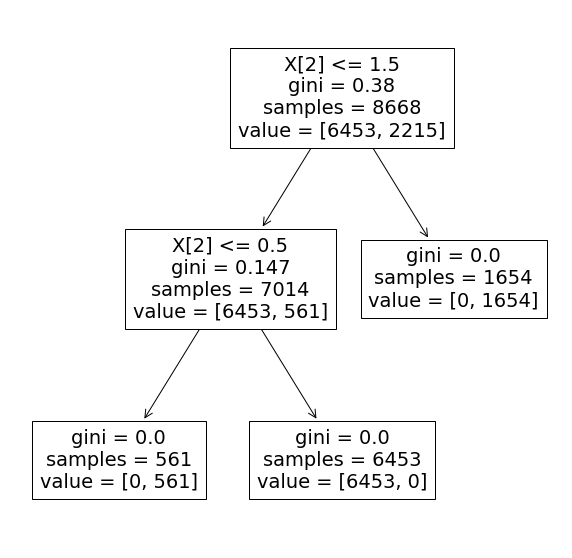

In [1132]:
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore)

In [1133]:
previsoes = arvore.predict([[18,0,2,2,1],[20,1, 1, 1,0]])
previsoes

array([1, 0])

In [1134]:
arvore.score(X_train,y_train)

1.0

In [1137]:
y_pred = naive_data.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'NB - Acurácia: {accuracy:.2f}%')

NB - Acurácia: 100.00%
